<a href="https://colab.research.google.com/github/RishiPM/Plant-Disease-Detection/blob/main/PlantDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Activation,Dense,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Model
import cv2                 
import numpy as np         
import os                 
from random import shuffle 
from tqdm import tqdm     
import matplotlib.pyplot as plt
import time 

TRAIN_DIR ='/gdrive/My Drive/TrainData/PlantVillages/PlantVillage'
IMG_SIZE =128
input_shape=(IMG_SIZE,IMG_SIZE,3)

In [ ]:
def label_imgv2(word_label):
    if word_label == 'Pepper__bell___Bacterial_spot': return 0
    elif word_label == 'Pepper__bell___healthy': return 1
    elif word_label == 'Potato___Early_blight': return 2
    elif word_label == 'Potato___healthy': return 3
    elif word_label == 'Potato___Late_blight': return 4
    elif word_label == 'Tomato__Target_Spot': return 5
    elif word_label == 'Tomato__Tomato_mosaic_virus': return 6
    elif word_label == 'Tomato__Tomato_YellowLeaf__Curl_Virus': return 7
    elif word_label == 'Tomato_Bacterial_spot': return 8
    elif word_label == 'Tomato_Early_blight': return 9
    elif word_label == 'Tomato_healthy': return 10
    elif word_label == 'Tomato_Late_blight': return 11
    elif word_label == 'Tomato_Leaf_Mold': return 12
    elif word_label == 'Tomato_Septoria_leaf_spot': return 13
    elif word_label == 'Tomato_Spider_mites_Two_spotted_spider_mite': return 14

def create_train_data():
    training_data = []
    
    for folder in os.listdir(TRAIN_DIR):
        i=0
        for img in os.listdir(TRAIN_DIR+"/"+folder):
            i+=1
            path = os.path.join(TRAIN_DIR+"/"+folder,img)
            
            try:
                label = label_imgv2(folder)
                img = cv2.imread(path,cv2.IMREAD_COLOR)
                img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
                training_data.append([np.array(img),np.array(label)])
            
            except:
                print(path)
            if i==500:
                break

    shuffle(training_data)
    return training_data


In [ ]:
train_data = create_train_data()

In [ ]:
os.listdir('/gdrive/My Drive/TrainData/PlantVillages/PlantVillage')

['Pepper__bell___Bacterial_spot',
 'Potato___healthy',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato__Tomato_YellowLeaf__Curl_Virus']

In [ ]:
train_y=np.array([i[1] for i in train_data])
train_x=np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,3)

train_x.shape

(7025, 128, 128, 3)

In [ ]:
train_x=train_x/255
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2)

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.1, rotation_range=50,
                                   width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
val_generator = val_datagen.flow(x_test, y_test, batch_size=20)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
                 input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(15, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      504       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        244       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        3

In [ ]:
custom=model.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/20
88/88 [==============================] - 5s 58ms/step - loss: 2.2000 - accuracy: 0.3012 - val_loss: 3.0481 - val_accuracy: 0.0641
Epoch 2/20
88/88 [==============================] - 4s 48ms/step - loss: 1.4095 - accuracy: 0.5370 - val_loss: 3.8874 - val_accuracy: 0.0641
Epoch 3/20
88/88 [==============================] - 4s 48ms/step - loss: 1.0384 - accuracy: 0.6518 - val_loss: 4.4586 - val_accuracy: 0.0712
Epoch 4/20
88/88 [==============================] - 4s 48ms/step - loss: 0.8286 - accuracy: 0.7315 - val_loss: 3.8990 - val_accuracy: 0.1416
Epoch 5/20
88/88 [==============================] - 4s 49ms/step - loss: 0.6777 - accuracy: 0.7792 - val_loss: 2.3983 - val_accuracy: 0.3011
Epoch 6/20
88/88 [==============================] - 4s 48ms/step - loss: 0.5623 - accuracy: 0.8119 - val_loss: 0.8949 - val_accuracy: 0.6932
Epoch 7/20
88/88 [==============================] - 4s 48ms/step - loss: 0.4859 - accuracy: 0.8404 - val_loss: 0.6560 - val_accuracy: 0.7815
Epoch 8/20
88

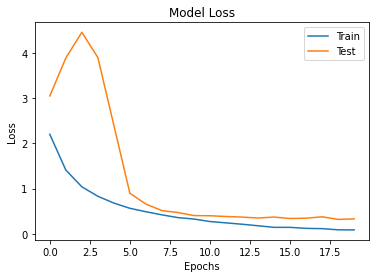

In [ ]:
plt.plot(custom.history['loss'])
plt.plot(custom.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

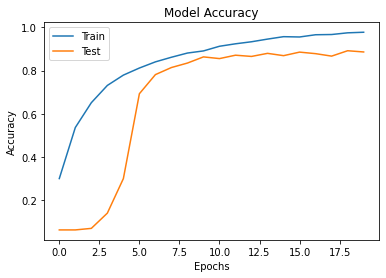

In [ ]:
plt.plot(custom.history['accuracy'])
plt.plot(custom.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
predictions = model.predict(x_test)
predictions

array([[6.75884716e-04, 8.10630620e-03, 2.03702220e-05, ...,
        1.22551182e-06, 7.94010144e-03, 1.48447532e-06],
       [9.66222107e-01, 5.09845186e-03, 2.45345041e-06, ...,
        1.03596445e-04, 1.56066199e-05, 5.83062461e-03],
       [3.37048870e-04, 4.88432579e-06, 2.07578996e-05, ...,
        2.27475015e-04, 2.95364647e-04, 1.18755306e-05],
       ...,
       [2.51629650e-08, 7.06479764e-10, 3.15316864e-13, ...,
        1.16446619e-09, 6.98806915e-11, 2.28858512e-12],
       [6.83179451e-08, 1.38090181e-05, 2.16456925e-07, ...,
        5.74986757e-07, 6.33704474e-07, 8.53292903e-08],
       [1.55476591e-04, 2.33703119e-08, 4.22206795e-05, ...,
        3.16991054e-06, 1.82636825e-07, 3.85570793e-08]], dtype=float32)

In [ ]:
y_preds = [np.argmax(i) for i in predictions]

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_preds))
print(metrics.classification_report(y_test,y_preds))

[[ 84   4   2   0   0   0   0   0   0   1   0   1   1   4   0]
 [  2 106   0   1   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0 101   0   2   0   0   0   0   0   0   2   0   0   0]
 [  0   0   0  26   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   4   2  99   0   0   0   0   3   0   1   0   5   0]
 [  1   0   0   1   1  85   1   0   0   4   3   0   1   1   6]
 [  0   0   0   0   0   0  82   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0 100   1   1   0   0   1   0   0]
 [  0   0   0   0   1   2   0   0  87   0   0   0   0   0   0]
 [  2   0   3   1   1   2   0   2   2  72   0   5   3   4   0]
 [  0   0   1   0   0   0   1   0   0   0  87   0   0   0   1]
 [  0   2   4   0   0   0   0   1   1   9   1  68   8   4   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0  80   5   0]
 [  3   0   4   0   0   2   3   0   0   6   0   0   5  81   0]
 [  3   0   0   0   0   1   0   4   0   0   0   0   0   1  87]]
              precision    recall  f1-score   support


In [ ]:
custom = model.fit_generator(train_generator, epochs=50, validation_data=val_generator, verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
176/176 [==============================] - 23s 130ms/step - loss: 0.8951 - accuracy: 0.7137 - val_loss: 0.7482 - val_accuracy: 0.7630
Epoch 2/50
176/176 [==============================] - 23s 129ms/step - loss: 0.6647 - accuracy: 0.7742 - val_loss: 0.7218 - val_accuracy: 0.7722
Epoch 3/50
176/176 [==============================] - 23s 129ms/step - loss: 0.5779 - accuracy: 0.8048 - val_loss: 0.6778 - val_accuracy: 0.7886
Epoch 4/50
176/176 [==============================] - 23s 129ms/step - loss: 0.5276 - accuracy: 0.8180 - val_loss: 0.4634 - val_accuracy: 0.8441
Epoch 5/50
176/176 [==============================] - 23s 129ms/step - loss: 0.5048 - accuracy: 0.8254 - val_loss: 0.8901 - val_accuracy: 0.7288
Epoch 6/50
176/176 [==============================] - 23s 130ms/step - loss: 0.4707 - accuracy: 0.8388 - val_loss: 0.6072 - val_accuracy: 0.7964
Epoch 7/50
176/176 [==============================] - 

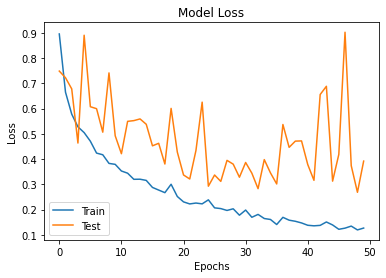

In [ ]:
plt.plot(custom.history['loss'])
plt.plot(custom.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

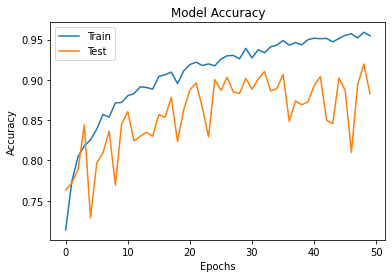

In [ ]:
plt.plot(custom.history['accuracy'])
plt.plot(custom.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
predictions = model.predict(x_test)
y_preds = [np.argmax(i) for i in predictions]

In [ ]:
print(metrics.confusion_matrix(y_test,y_preds))
print(metrics.classification_report(y_test,y_preds))

[[ 87   8   0   0   0   0   0   0   0   0   0   0   0   2   0]
 [  0 110   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 103   0   0   0   0   0   0   0   0   0   0   2   0]
 [  0   0   0  26   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0  14   4  92   0   0   0   0   2   0   2   0   0   0]
 [  0   3   0   3   0  78   0   0   0   1   8   0   0   3   8]
 [  0   0   0   0   0   0  78   0   0   1   0   0   0   4   0]
 [  0   2   0   0   0   0   0  94   0   2   0   2   0   0   3]
 [  0   0   2   0   2   3   0   3  75   5   0   0   0   0   0]
 [  0   1   2   0   1   3   0   0   0  85   0   4   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0  90   0   0   0   0]
 [  1   2   5   0   2   0   0   0   0   8   2  75   0   2   1]
 [  0   0   0   0   0   0   1   0   0   0   1   0  83   2   0]
 [  3   0   3   1   0   0   0   0   0   3   0   0   0  94   0]
 [  0   1   0   0   0   5   0   0   0   1  18   0   1   0  70]]
              precision    recall  f1-score   support


In [ ]:
classes = ['Pepper__bell___Bacterial_spot','Pepper__bell___healthy','Potato___Early_blight','Potato___healthy',
           'Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus',
           'Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold',
           'Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']

Tomato_Late_blight


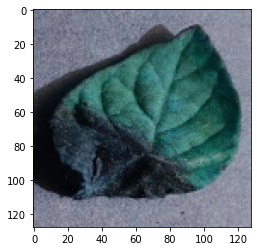

In [ ]:
plt.imshow(train_x[100])
plt.show
print(classes[train_y[100]])

In [ ]:
from tensorflow.keras.preprocessing import image
test=train_x[100]
test=image.img_to_array(test)
test=test.reshape((-1,IMG_SIZE,IMG_SIZE,3))
predictions = model.predict(test)
predictions

array([[5.5935155e-03, 1.4800041e-05, 5.7810019e-03, 1.2584126e-03,
        1.1524791e-01, 2.8780156e-05, 1.7022602e-06, 6.4763409e-04,
        9.4660514e-05, 1.2817599e-02, 1.2710074e-05, 8.3857703e-01,
        8.4624928e-04, 1.7522872e-04, 1.8902762e-02]], dtype=float32)

In [ ]:
classes[np.argmax(predictions)]

'Tomato_Late_blight'